1️⃣ Quantos usuários utilizam a Netflix pelo Tablet?

2️⃣ Qual é a representatividade (em %) do sistema operacional(device) mais utilizado para assistir Netflix

3️⃣ Crie visualizações que responda as seguintes perguntas:

    🔸Qual é o sistema operacional(device) mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?
    🔸No Brasil, qual é o sistema operacional mais utilizado? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix.csv")

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
device_tablet = df[df['Device'] == 'Tablet']
print(f'A quantidade de usuários que utilizam Netflix com o Tablet é', device_tablet['Device'].count())


A quantidade de usuários que utilizam Netflix com o Tablet é 633


In [6]:
df_device = df['Device'].value_counts()
print('O sistema mais utilizado pelos usuários é:')
df_device


O sistema mais utilizado pelos usuários é:


Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [7]:
df_device = df['Device'].value_counts(normalize='True')
print('O sistema mais utilizado pelos usuários é:')
df_device

O sistema mais utilizado pelos usuários é:


Device
Laptop        0.2544
Tablet        0.2532
Smartphone    0.2484
Smart TV      0.2440
Name: proportion, dtype: float64

In [8]:
# df_netflix.loc[df_netflix['Age'] < 25, 'grupo_idade'] = '20-24'
df.loc[df['Age'] < 25, 'grupo idade'] = '20 - 24'
df.loc[(df['Age'] >= 25) & (df['Age'] < 29), 'grupo idade'] = '25-29'
df.loc[(df['Age'] >= 30) & (df['Age'] < 34), 'grupo idade'] = '30-34'
df.loc[(df['Age'] >= 35) & (df['Age'] < 40), 'grupo idade'] = '35-39'
df.loc[(df['Age'] >= 40) & (df['Age'] < 45), 'grupo idade'] = '40-44'
df.loc[(df['Age'] >= 45) & (df['Age'] < 50), 'grupo idade'] = '45-49'
df.loc[(df['Age'] >= 50) & (df['Age'] < 55), 'grupo idade'] = '50-54'
df.loc[(df['Age'] >= 55) & (df['Age'] < 60), 'grupo idade'] = '55-59'
df.loc[df['Age'] >= 60, 'grupo idade'] = '60+'
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,grupo idade
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,25-29
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,35-39
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,40-44
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,50-54
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,30-34
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,25-29
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,30-34
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,35-39
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,45-49


🔸Qual é o sistema operacional(device) mais usado para cada faixa etária? Existe algum padrão?
- O tipo de aparelho muda de acordo com o grupo de idade?
- No Brasil, qual é o sistema operacional mais utilizado? 

In [9]:
df.groupby(['grupo idade', 'Device']).size()

grupo idade  Device    
25-29        Laptop         53
             Smart TV       53
             Smartphone     51
             Tablet         46
30-34        Laptop         97
             Smart TV      112
             Smartphone     95
             Tablet        112
35-39        Laptop        133
             Smart TV      124
             Smartphone    134
             Tablet        125
40-44        Laptop        147
             Smart TV      100
             Smartphone    133
             Tablet        119
45-49        Laptop        117
             Smart TV      131
             Smartphone    119
             Tablet        130
50-54        Laptop         48
             Smart TV       44
             Smartphone     39
             Tablet         46
dtype: int64

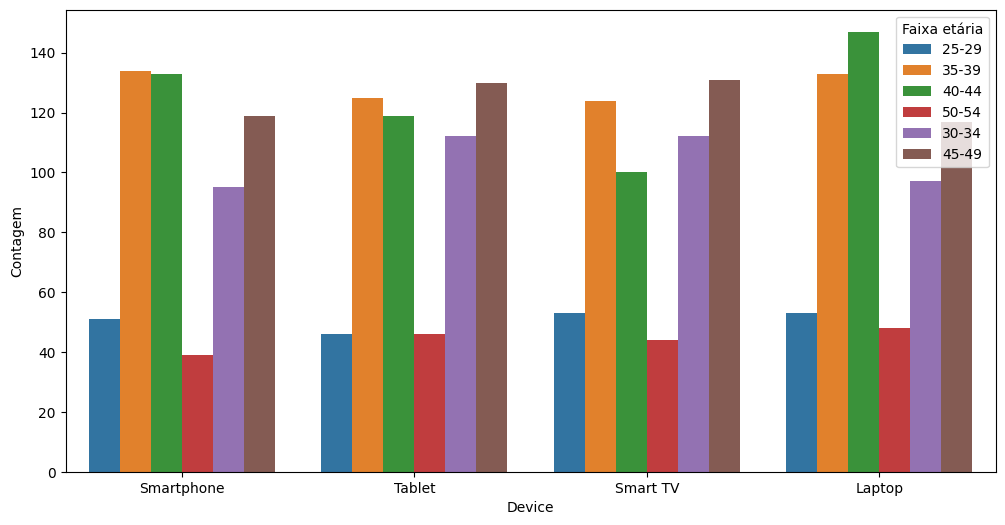

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot( data= df,
              x='Device',
              hue='grupo idade')
plt.xlabel('Device')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária')
plt.show()

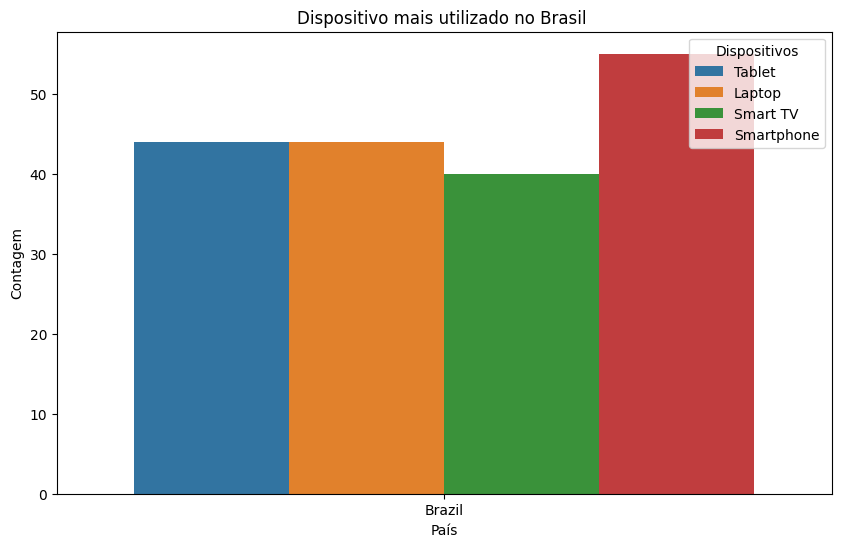

In [14]:
# Filtrando os dados para o Brasil
df_brazil = df[df['Country'] == 'Brazil']

plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_brazil,
              x = 'Country',
              hue = 'Device')

# definir o título e eixos x e y
plt.title('Dispositivo mais utilizado no Brasil ')
plt.xlabel('País')
plt.ylabel('Contagem')

# definir texto da legenda
plt.legend(title = 'Dispositivos')

plt.show()